# Flight Fare Prediction

## 1. Problem Definition

https://www.kaggle.com/nikhilmittal/flight-fare-prediction-mh/

In [285]:
# --- import libraries and dependencies ---

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%config InlineBackend.figure_format='retina'

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

from sklearn import tree
from sklearn import metrics
from sklearn import model_selection

import math, time, random, datetime

import warnings
warnings.filterwarnings('ignore')

In [286]:
# --- set max columns and rows ---

pd.set_option('max_columns', None)
pd.set_option('max_rows', None)

## 2. Data Collection

In [287]:
# --- import data ---

train_url ='https://github.com/ufukeskici/datasets/blob/main/flight_fare/Data_Train.xlsx?raw=true'
test_url = 'https://github.com/ufukeskici/datasets/blob/main/flight_fare/Test_set.xlsx?raw=true'

df0 = pd.read_excel(train_url)
test0 = pd.read_excel(test_url)

## 3. Data Wrangling

### 3.1. Data Discovery

In [288]:
df1 = df0.copy()
test1 = test0.copy()

In [289]:
# --- check the imported training dataset ---

df1.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [290]:
# --- check the imported test dataset ---

test1.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [291]:
# --- check the shape of the datasets ---

print(f"{'Shape of the training dataset:': <30} {df1.shape}")
print(f"{'Shape of the test dataset:': <30} {test1.shape}")

Shape of the training dataset: (10683, 11)
Shape of the test dataset:     (2671, 10)


In [292]:
# --- summary of the training dataset ---

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [293]:
# --- summary of the test dataset ---

test1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [294]:
# --- discover numerical features ---

num_features = df1.select_dtypes(include=['int64']).columns
num_features

Index(['Price'], dtype='object')

In [295]:
# --- discover categorical features ---

cat_features = df1.select_dtypes(include=['object']).columns
cat_features

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info'],
      dtype='object')

### 3.2. Data Cleaning

In [296]:
df2 = df1.copy()
test2 = test1.copy()

In [297]:
# --- find the number of missing values of training dataset ---

df2.isna().sum().sort_values(ascending=False)

Route              1
Total_Stops        1
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Dep_Time           0
Arrival_Time       0
Duration           0
Additional_Info    0
Price              0
dtype: int64

In [298]:
# --- find the number of missing values of test dataset ---

test2.isna().sum().sort_values(ascending=False)

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [299]:
# --- drop missing values ---

df2.dropna(inplace=True)

### 3.2.1. Handling Numerical Data

In [306]:
# --- extract the day of the journey --- 

df2["Journey_day"] = pd.to_datetime(df2.Date_of_Journey, format="%d/%m/%Y").dt.day
test2["Journey_day"] = pd.to_datetime(test2.Date_of_Journey, format="%d/%m/%Y").dt.day

AttributeError: 'DataFrame' object has no attribute 'Date_of_Journey'

In [301]:
# --- extract the month of the journey --- 

df2["Journey_month"] = pd.to_datetime(df2.Date_of_Journey, format = "%d/%m/%Y").dt.month
test2["Journey_month"] = pd.to_datetime(test2.Date_of_Journey, format = "%d/%m/%Y").dt.month

In [302]:
# --- drop 'date_of_journey' column ---

df2.drop(["Date_of_Journey"], axis = 1, inplace = True)
test2.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [303]:
# --- extract hours of the departure ---

df2["Dep_hour"] = pd.to_datetime(df2.Dep_Time).dt.hour
test2["Dep_hour"] = pd.to_datetime(test2.Dep_Time).dt.hour

In [304]:
# --- extract minutes of the departure ---

df2["Dep_min"] = pd.to_datetime(df2.Dep_Time).dt.minute
test2["Dep_min"] = pd.to_datetime(test2.Dep_Time).dt.minute

In [305]:
# --- drop 'dep_time' column ---

df2.drop(["Dep_Time"], axis = 1, inplace = True)
test2.drop(["Dep_Time"], axis = 1, inplace = True)

In [307]:
# --- extract hours of the arrival ---

df2["Arrival_hour"] = pd.to_datetime(df2.Arrival_Time).dt.hour
test2["Arrival_hour"] = pd.to_datetime(test2.Arrival_Time).dt.hour

In [308]:
# --- extract minutes of the arrival ---

df2["Arrival_min"] = pd.to_datetime(df2.Arrival_Time).dt.minute
test2["Arrival_min"] = pd.to_datetime(test2.Arrival_Time).dt.minute

In [309]:
# --- drop 'arrival_time' column ---

df2.drop(["Arrival_Time"], axis = 1, inplace = True)
test2.drop(["Arrival_Time"], axis = 1, inplace = True)

In [310]:
# --- define the condition ---

def condition(x):
    if ('h' in x) & ('m' in x):
        return x
    elif ('m' in x):
        return '0h ' + x
    elif ('h' in x):
        return x + ' 0m'

In [311]:
# --- apply the condition ---

df2['Duration'] = df2['Duration'].apply(condition)
test2['Duration'] = test2['Duration'].apply(condition)

In [312]:
# --- split duration value into 'hours' and 'minutes' ---

df2['Duration_hours'] = df2['Duration'].apply(lambda x: x.split(' ')[0])
df2['Duration_mins'] = df2['Duration'].apply(lambda x: x.split(' ')[1])
test2['Duration_hours'] = test2['Duration'].apply(lambda x: x.split(' ')[0])
test2['Duration_mins'] = test2['Duration'].apply(lambda x: x.split(' ')[1])

In [313]:
# --- remove the last character of 'hours' and 'minutes' ---

df2['Duration_hours'] = df2['Duration_hours'].apply(lambda x: x[:-1])
df2['Duration_mins'] = df2['Duration_mins'].apply(lambda x: x[:-1])
test2['Duration_hours'] = test2['Duration_hours'].apply(lambda x: x[:-1])
test2['Duration_mins'] = test2['Duration_mins'].apply(lambda x: x[:-1])

In [314]:
# --- drop 'duration' column ---

df2.drop(['Duration'], axis = 1, inplace = True)
test2.drop(['Duration'], axis = 1, inplace = True)

In [315]:
# --- check train dataset again ---

df2.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [316]:
# --- check test dataset again ---

test2.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,6,6,17,30,4,25,10,55
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,1 stop,No info,12,5,6,20,10,20,4,0
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,In-flight meal not included,21,5,19,15,19,0,23,45
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,21,5,8,0,21,0,13,0
4,Air Asia,Banglore,Delhi,BLR → DEL,non-stop,No info,24,6,23,55,2,45,2,50


### 3.2.2. Handling Categorical Data

In [317]:
# --- check 'airline' column values ---

df2['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [319]:
# --- perform one hot encoding for 'airline' column since the values are nominal ---

Airline = df2[["Airline"]]
Airline = pd.get_dummies(Airline, drop_first= True)

Airline2 = test2[["Airline"]]
Airline2 = pd.get_dummies(Airline2, drop_first= True)

Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [320]:
# --- check 'source' column values ---

df2['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [321]:
# --- perform one hot encoding for 'source' column since the values are nominal ---

Source = df2[["Source"]]
Source = pd.get_dummies(Source, drop_first= True)

Source2 = test2[["Source"]]
Source2 = pd.get_dummies(Source2, drop_first= True)

Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [322]:
# --- check 'destination' column values ---

df2['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [323]:
# --- perform one hot encoding for 'destination' column since the values are nominal ---

Destination = df2[["Destination"]]
Destination = pd.get_dummies(Destination, drop_first= True)

Destination2 = test2[["Destination"]]
Destination2 = pd.get_dummies(Destination2, drop_first= True)

Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [324]:
# --- check 'route' column values ---

df2['Route'].value_counts()

DEL → BOM → COK                      2376
BLR → DEL                            1552
CCU → BOM → BLR                       979
CCU → BLR                             724
BOM → HYD                             621
CCU → DEL → BLR                       565
BLR → BOM → DEL                       402
MAA → CCU                             381
DEL → HYD → COK                       326
DEL → JAI → BOM → COK                 240
DEL → BLR → COK                       232
DEL → COK                             213
DEL → AMD → BOM → COK                 205
DEL → MAA → COK                       146
DEL → IDR → BOM → COK                  99
DEL → HYD → MAA → COK                  83
DEL → NAG → BOM → COK                  71
CCU → MAA → BLR                        65
DEL → GOI → BOM → COK                  58
DEL → HYD → BOM → COK                  56
CCU → HYD → BLR                        53
DEL → BHO → BOM → COK                  50
CCU → BBI → BLR                        50
CCU → IXR → DEL → BLR             

In [325]:
# --- drop 'route' column since 'total_stops' feature is derived from 'route' feature ---

df2.drop(['Route'], axis = 1, inplace = True)
test2.drop(['Route'], axis = 1, inplace = True)

In [326]:
# --- check 'total_stops' column values ---

df2['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [327]:
# --- perform label encoding for 'total_stops' column since the values are ordinal ---

df2.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)
test2.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)
df2.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,No info,13302,1,3,16,50,21,35,4,45


In [328]:
# --- check 'additional_info' column values ---

df2['Additional_Info'].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
Red-eye flight                     1
2 Long layover                     1
1 Short layover                    1
Name: Additional_Info, dtype: int64

In [329]:
# --- drop 'additional_value' column since most of the values have no info ---

df2.drop(['Additional_Info'], axis = 1, inplace = True) 
test2.drop(['Additional_Info'], axis = 1, inplace = True) 

In [330]:
# --- concatenate all encoded features with original dataframe ---

df2 = pd.concat([df2, Airline, Source, Destination], axis = 1)
test2 = pd.concat([test2, Airline2, Source2, Destination2], axis = 1)

In [331]:
# --- drop 'airline', 'source' and 'destination' columns ---

df2.drop(['Airline', 'Source', 'Destination'], axis = 1, inplace = True) 
test2.drop(['Airline', 'Source', 'Destination'], axis = 1, inplace = True) 

In [332]:
test2.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,6,6,17,30,4,25,10,55,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,1,12,5,6,20,10,20,4,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,21,5,19,15,19,0,23,45,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,21,5,8,0,21,0,13,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,0,24,6,23,55,2,45,2,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


## 4. Feature Selection

In [333]:
df2.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [334]:
# --- prepare X with all columns except 'price' ---

X = df2.loc[:, [
    'Total_Stops', 
    'Journey_day', 
    'Journey_month', 
    'Dep_hour',
    'Dep_min', 
    'Arrival_hour', 
    'Arrival_min', 
    'Duration_hours',
    'Duration_mins', 
    'Airline_Air India', 
    'Airline_GoAir', 
    'Airline_IndiGo',
    'Airline_Jet Airways', 
    'Airline_Jet Airways Business',
    'Airline_Multiple carriers',
    'Airline_Multiple carriers Premium economy', 
    'Airline_SpiceJet',
    'Airline_Trujet', 
    'Airline_Vistara', 
    'Airline_Vistara Premium economy',
    'Source_Chennai', 
    'Source_Delhi', 
    'Source_Kolkata', 
    'Source_Mumbai',
    'Destination_Cochin', 
    'Destination_Delhi', 
    'Destination_Hyderabad',
    'Destination_Kolkata', 
    'Destination_New Delhi'
    ]]

In [335]:
# --- prepare y with only 'price' column---

y = df2.iloc[:, 1]
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

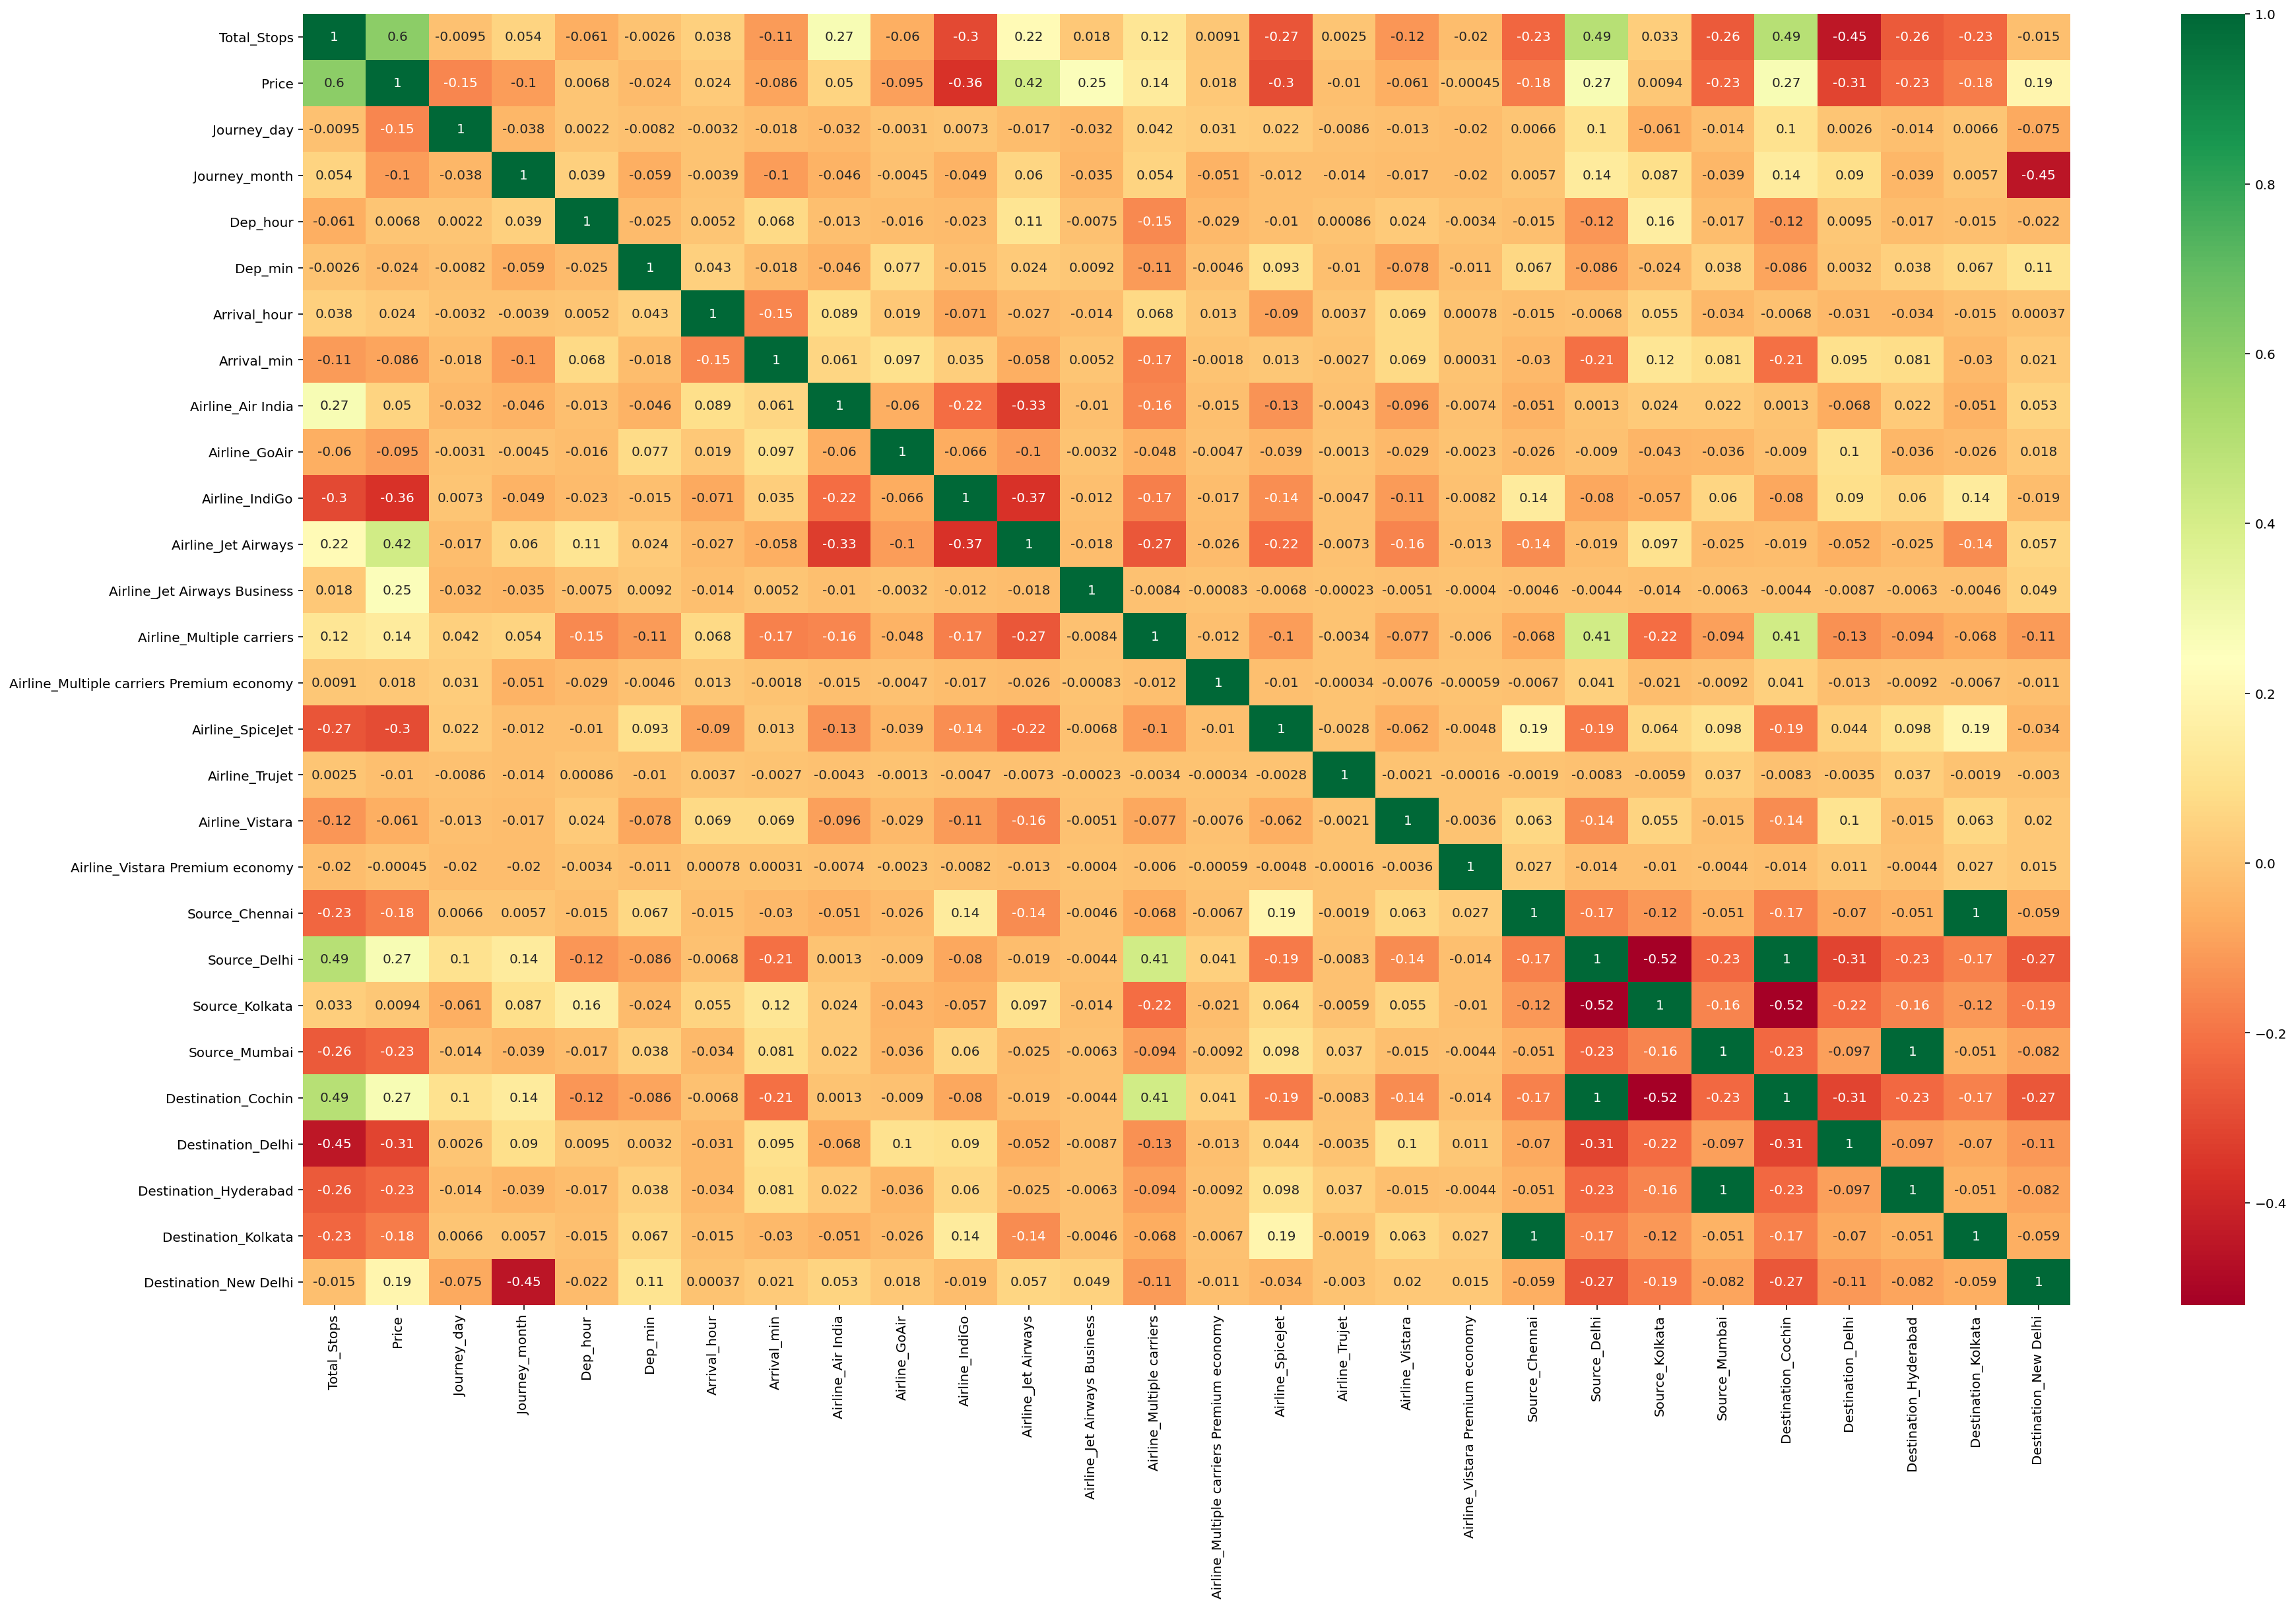

In [336]:
# --- discover the correlation between features ---

plt.figure(figsize = (30,18))
sns.heatmap(df2.corr(), annot = True, cmap = "RdYlGn")
plt.show()

In [337]:
# --- discover important feature using ExtraTreesRegressor

selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

In [338]:
# --- print feature importances ---

print(selection.feature_importances_)

[2.42447498e-01 1.43409104e-01 5.32033347e-02 2.46702595e-02
 2.15368936e-02 2.79360830e-02 1.89009985e-02 1.04214466e-01
 1.79220573e-02 9.43879024e-03 1.81458988e-03 1.86662519e-02
 1.39566068e-01 6.70793959e-02 1.90876396e-02 8.98179394e-04
 2.75456213e-03 8.18904892e-05 5.26152711e-03 8.80551452e-05
 5.49928613e-04 1.19526749e-02 3.44981156e-03 8.06421855e-03
 1.09764372e-02 1.45240953e-02 6.33866267e-03 4.61123748e-04
 2.47054029e-02]


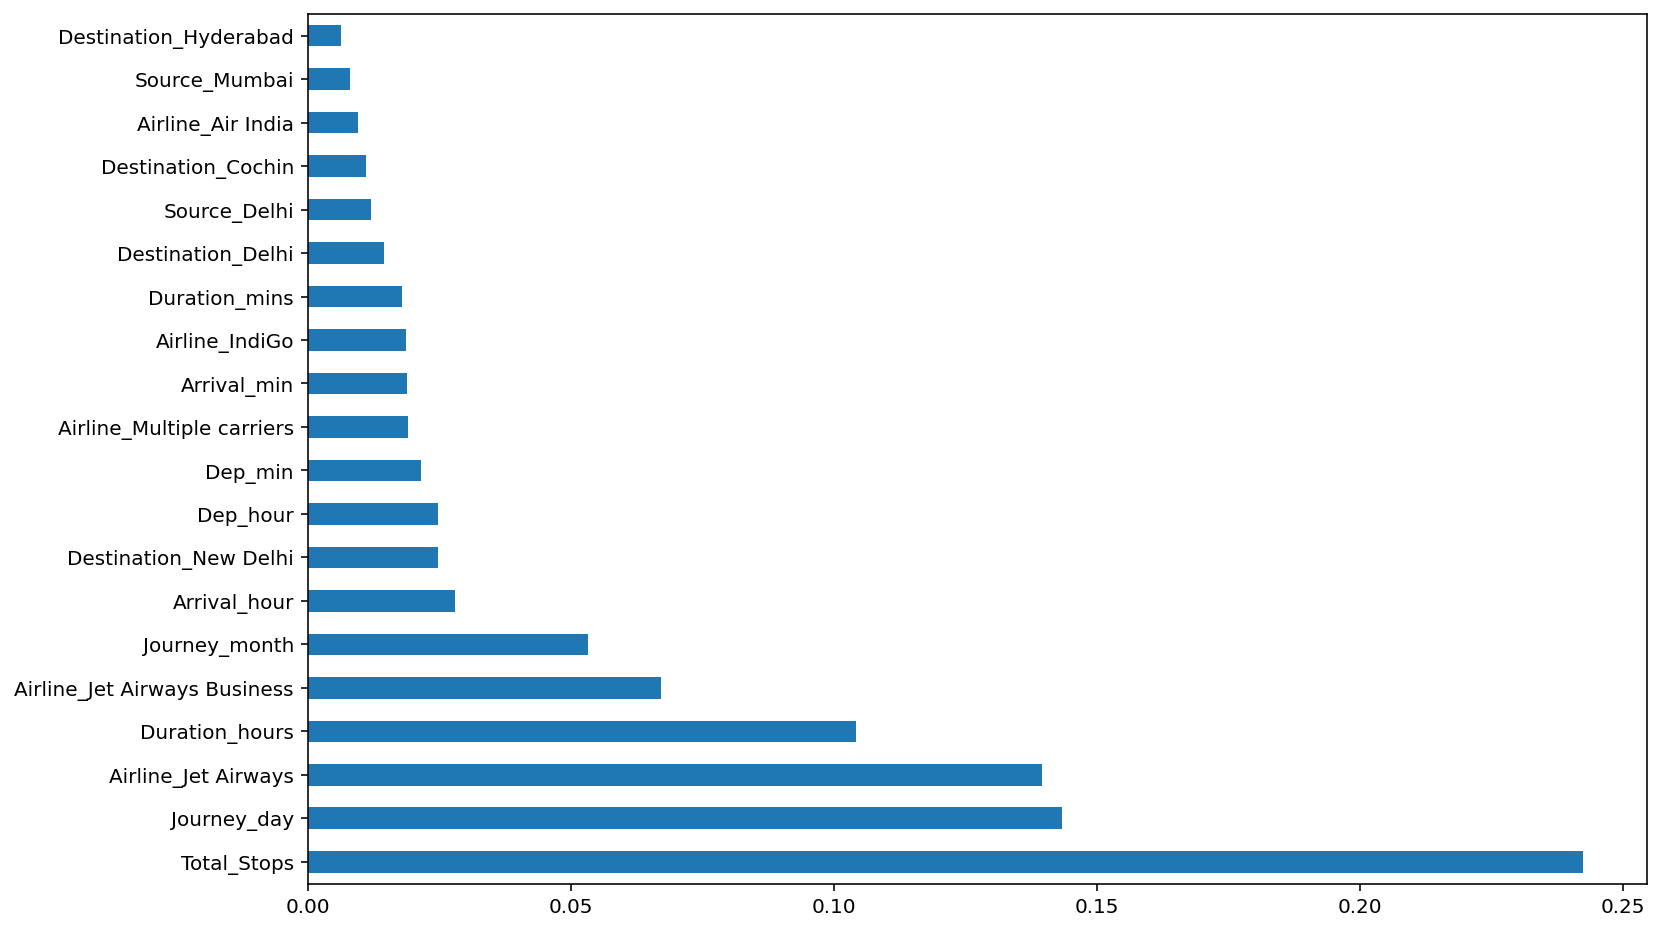

In [339]:
# --- plot feature importances ---

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [340]:
# --- split the data into train and test set ---

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 99)

In [350]:
# --- create the model and fit ---

reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor()

In [351]:
# --- make a prediction ---

y_pred = reg_rf.predict(X_test)

In [352]:
# --- calculate training score ---

reg_rf.score(X_train, y_train)

0.9546388713448857

In [353]:
# --- calculate test score ---

reg_rf.score(X_test, y_test)

0.8107037426980458

In [354]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1206.273327439861
MSE: 3689829.3565221597
RMSE: 1920.8928539932049


In [355]:
metrics.r2_score(y_test, y_pred)

0.8107037426980458

## 4. HYPERPARAMETER TUNING

In [356]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [357]:
random_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf
    }

In [358]:
rf_random = RandomizedSearchCV(
    estimator = reg_rf, 
    param_distributions = random_grid, 
    scoring='neg_mean_squared_error', 
    n_iter = 10, 
    cv = 5, 
    verbose = 2,
    random_state = 99,
    n_jobs = 1)

In [359]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=600; total time=   5.4s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=600; total time=   5.3s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=600; total time=   5.3s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=600; total time=   5.3s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=600; total time=   5.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   4.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   4.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimat

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=99, scoring='neg_mean_squared_error',
                   verbose=2)

In [360]:
# --- check best parameters ---

rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 15}

In [361]:
# --- fit with best parameters ---

prediction = rf_random.predict(X_test)

In [362]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 1287.4979607283244
MSE: 3490797.1144580143
RMSE: 1868.3674998399042


## 4. SAVING THE MODEL

In [363]:
# --- save the model via pickle ---

import pickle
file = open('flight_rf.pkl', 'wb')
pickle.dump(reg_rf, file)

In [364]:
# --- read and load the model file ---

model = open('flight_rf.pkl','rb')
forest = pickle.load(model)

In [365]:
# --- make the prediction via imported model ---

y_prediction = forest.predict(X_test)

In [366]:
# --- calculate the score again ---

metrics.r2_score(y_test, y_prediction)

0.8107037426980458